# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime 

#Reading the csv file and converting the Date to Datetime 
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [2]:
#Transform tenths of degrees to degrees Celcius
df['Data_Value'] = df['Data_Value']/10
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [3]:
#Get the year of each measurement
df['Year'] = df['Date'].dt.year

#Get the month and day to filter the leap days
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')

#Remove the leap days
df = df[df['Month_Day']!='02-29']
df.head()

,ID,Date,Element,Data_Value,Year,Month_Day
0,USW00094889,2014-11-12,TMAX,2.2,2014,11-12
1,USC00208972,2009-04-29,TMIN,5.6,2009,04-29
2,USC00200032,2008-05-26,TMAX,27.8,2008,05-26
3,USC00205563,2005-11-11,TMAX,13.9,2005,11-11
4,USC00200230,2014-02-27,TMAX,-10.6,2014,02-27


In [4]:
#Serie with the records of max temperatures per day between 2005 and 2014
high_temp = df[(df['Year'] >= 2005) & (df['Year'] < 2015) & (df['Element'] == 'TMAX')].groupby('Month_Day')['Data_Value'].max()
high_temp.head()

Month_Day
01-01    15.6
01-02    13.9
01-03    13.3
01-04    10.6
01-05    12.8
Name: Data_Value, dtype: float64

In [5]:
#Serie with the records of min temperatures per day between 2005 and 2014
low_temp = df[(df['Year'] >= 2005) & (df['Year'] < 2015) & (df['Element'] == 'TMIN')].groupby('Month_Day')['Data_Value'].min()
low_temp.head()

Month_Day
01-01   -16.0
01-02   -26.7
01-03   -26.7
01-04   -26.1
01-05   -15.0
Name: Data_Value, dtype: float64

In [6]:
#Create a Serie with a year dates to use it as 'x' axis for the graph
year_dates = np.arange('2015-01-01', '2016-01-01', dtype = 'datetime64[D]' )

In [7]:
#df with the highiest temperature values of 2015 vs the records 2005-2014
df_h = df[(df['Year'] == 2015) & (df['Element'] == 'TMAX')].groupby('Month_Day')['Data_Value'].max().reset_index().rename(columns={'Data_Value':'Max_Temp_2015'})
df_h = df_h.merge(high_temp, on='Month_Day')
df_h['Dates_2015'] = year_dates
df_h.head()

,Month_Day,Max_Temp_2015,Data_Value,Dates_2015
0,01-01,1.1,15.6,2015-01-01
1,01-02,3.9,13.9,2015-01-02
2,01-03,3.9,13.3,2015-01-03
3,01-04,4.4,10.6,2015-01-04
4,01-05,2.8,12.8,2015-01-05


In [8]:
#df with the lowest temperature values of 2015 vs the records 2005-2014
df_l = df[(df['Year'] == 2015) & (df['Element'] == 'TMIN')].groupby('Month_Day')['Data_Value'].min().reset_index().rename(columns={'Data_Value':'Min_Temp_2015'})
df_l = df_l.merge(low_temp, on='Month_Day')
df_l['Dates_2015'] = year_dates
df_l.head()

,Month_Day,Min_Temp_2015,Data_Value,Dates_2015
0,01-01,-13.3,-16.0,2015-01-01
1,01-02,-12.2,-26.7,2015-01-02
2,01-03,-6.7,-26.7,2015-01-03
3,01-04,-8.8,-26.1,2015-01-04
4,01-05,-15.5,-15.0,2015-01-05


In [9]:
#df with the highest temperatures in 2015 breaking the records in 2005-2014
breaking_high = df_h[df_h['Max_Temp_2015'] > df_h['Data_Value']]
breaking_high.head()

,Month_Day,Max_Temp_2015,Data_Value,Dates_2015
39,02-09,8.3,7.8,2015-02-09
106,04-17,27.8,24.4,2015-04-17
126,05-07,30.6,25.6,2015-05-07
127,05-08,33.3,31.7,2015-05-08
130,05-11,30.6,29.4,2015-05-11


In [10]:
#df with the lowest temperatures in 2015 breaking the records in 2005-2014
breaking_low = df_l[df_l['Min_Temp_2015'] < df_l['Data_Value']]
breaking_low.head()

,Month_Day,Min_Temp_2015,Data_Value,Dates_2015
4,01-05,-15.5,-15.0,2015-01-05
10,01-11,-20.0,-18.3,2015-01-11
33,02-03,-23.8,-23.2,2015-02-03
44,02-14,-23.9,-21.7,2015-02-14
45,02-15,-26.0,-25.6,2015-02-15


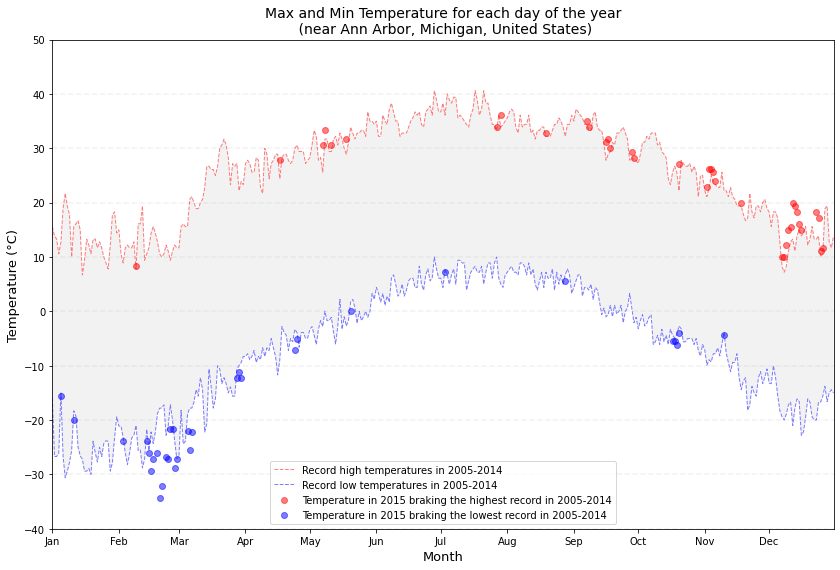

In [11]:
#Graph with the record temperature
plt.figure(figsize=(14,9))
plt.plot(year_dates, high_temp, linestyle= '--', color='r', linewidth=1, label='Record high temperatures in 2005-2014', alpha=0.5)
plt.plot(year_dates, low_temp, linestyle= '--', color='b', linewidth=1, label='Record low temperatures in 2005-2014', alpha=0.5)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Temperature (°C)', fontsize=13)
plt.title('Max and Min Temperature for each day of the year\n (near Ann Arbor, Michigan, United States)', fontsize=14)

ax = plt.gca()
#Setting the limits of the graph
ax.axis([datetime.date(2015,1,1) , datetime.date(2015,12,31), -40, 50])

#Format x axis dates to Month names
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
#Rotates the ticks 45°
#plt.xticks(rotation = 45)
#Set x axis to show monthly ticks
ax.xaxis.set_major_locator(dates.MonthLocator())

#Filling the space between temperatures
plt.gca().fill_between(year_dates, low_temp, high_temp, facecolor='gray', alpha=0.1)

#Horizontal lines to help the visualization 
for i in plt.gca().get_yticks():
    plt.axhline(i, color='gray', linestyle='--', alpha=0.1)
    
#Scatterplot for the braking values in 2015
plt.scatter(breaking_high['Dates_2015'], breaking_high['Max_Temp_2015'], color='red', alpha=0.5, label='Temperature in 2015 braking the highest record in 2005-2014')
plt.scatter(breaking_low['Dates_2015'], breaking_low['Min_Temp_2015'], color='blue', alpha=0.5, label='Temperature in 2015 braking the lowest record in 2005-2014')
# Add the legend
plt.legend(loc='lower center')

#Saving figure as png
plt.savefig('Temperatures.png')